In [1]:
library('infer')
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Fair coin example with infer package

In [2]:
heads_140 <- data.frame(toss = c(rep("heads", 140), rep("tails", 250 - 140)))

heads_140 |> head()

,toss
,<chr>
1,heads
2,heads
3,heads
4,heads
5,heads
6,heads


In [3]:
heads_140 |> count(toss)

toss,n
<chr>,<int>
heads,140
tails,110


In [5]:
obs_n_heads = heads_140 |>
  specify(response = toss, success = 'heads') |>
  calculate(stat = 'count')

obs_n_heads

stat
<int>
140


In [6]:
heads_140 |>
  summarize(stat = sum(toss == 'heads'))

stat
<int>
140


In [9]:
null_dist = heads_140 |>
  specify(response = toss, success = 'heads') |>
  hypothesize('point', p = 0.5) |>
  generate(reps = 1000, type = 'draw') |>
  calculate(stat = 'count')

null_dist |> head()

replicate,stat
<int>,<int>
1,127
2,120
3,120
4,115
5,115
6,122


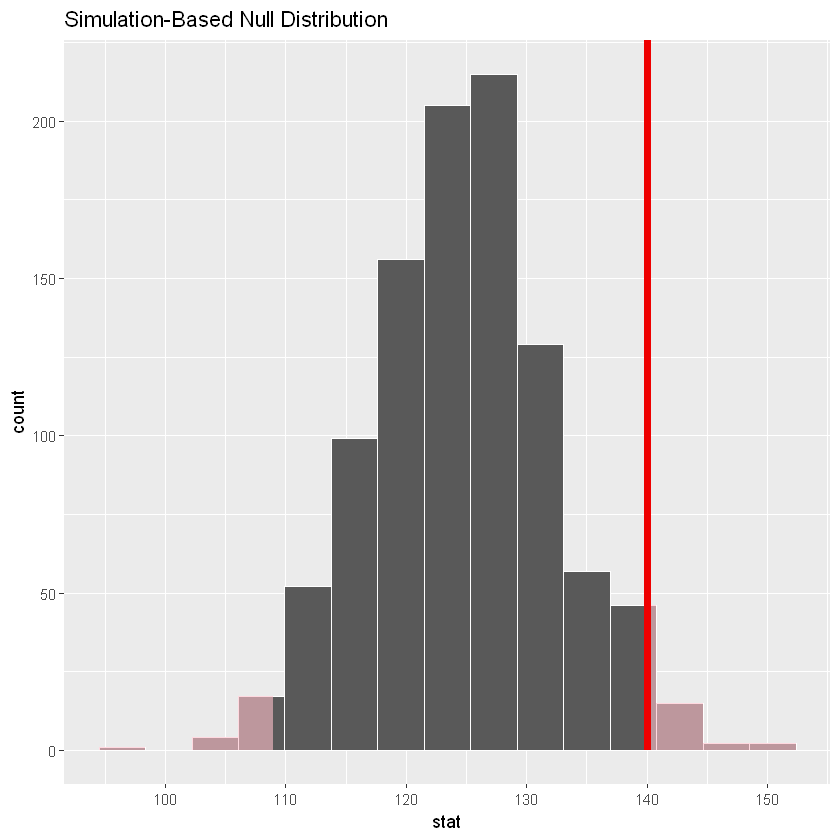

In [12]:
null_dist |>
  visualize() +
  shade_p_value(obs_stat = obs_n_heads, direction = 'two-sided')

In [13]:
null_dist |> get_p_value(obs_stat = 140, direction = 'two-sided')

p_value
<dbl>
0.054


## Birth weight example

In [14]:
nsfg = read_csv('nsfg_simple.csv', col_types = cols()) #no csv file

nsfg |> head()

ERROR: Error: 'nsfg_simple.csv' does not exist in current working directory ('c:/Users/agung/Data 730/moderndive/inclass').


In [11]:
nsfg |> summarize(cor_coef = cor(agepreg, totalwgt_lb, method = 'pearson'))

cor_coef
<dbl>
0.06883397


In [12]:
nsfg |>
    specify(response = totalwgt_lb, explanatory = agepreg) |>
    calculate(stat = 'correlation')

stat
<dbl>
0.06883397


In [13]:
null_dist_nsfg = nsfg |>
    specify(response = totalwgt_lb, explanatory = agepreg) |>
    hypothesize('independence') |>
    generate(reps = 1000, type = 'permute') |>
    calculate(stat = 'correlation')

null_dist_nsfg |> head()

replicate,stat
<int>,<dbl>
1,-0.0092707736
2,-0.0086801357
3,-0.0119872059
4,-0.0123535627
5,0.0077141298
6,0.0008265637


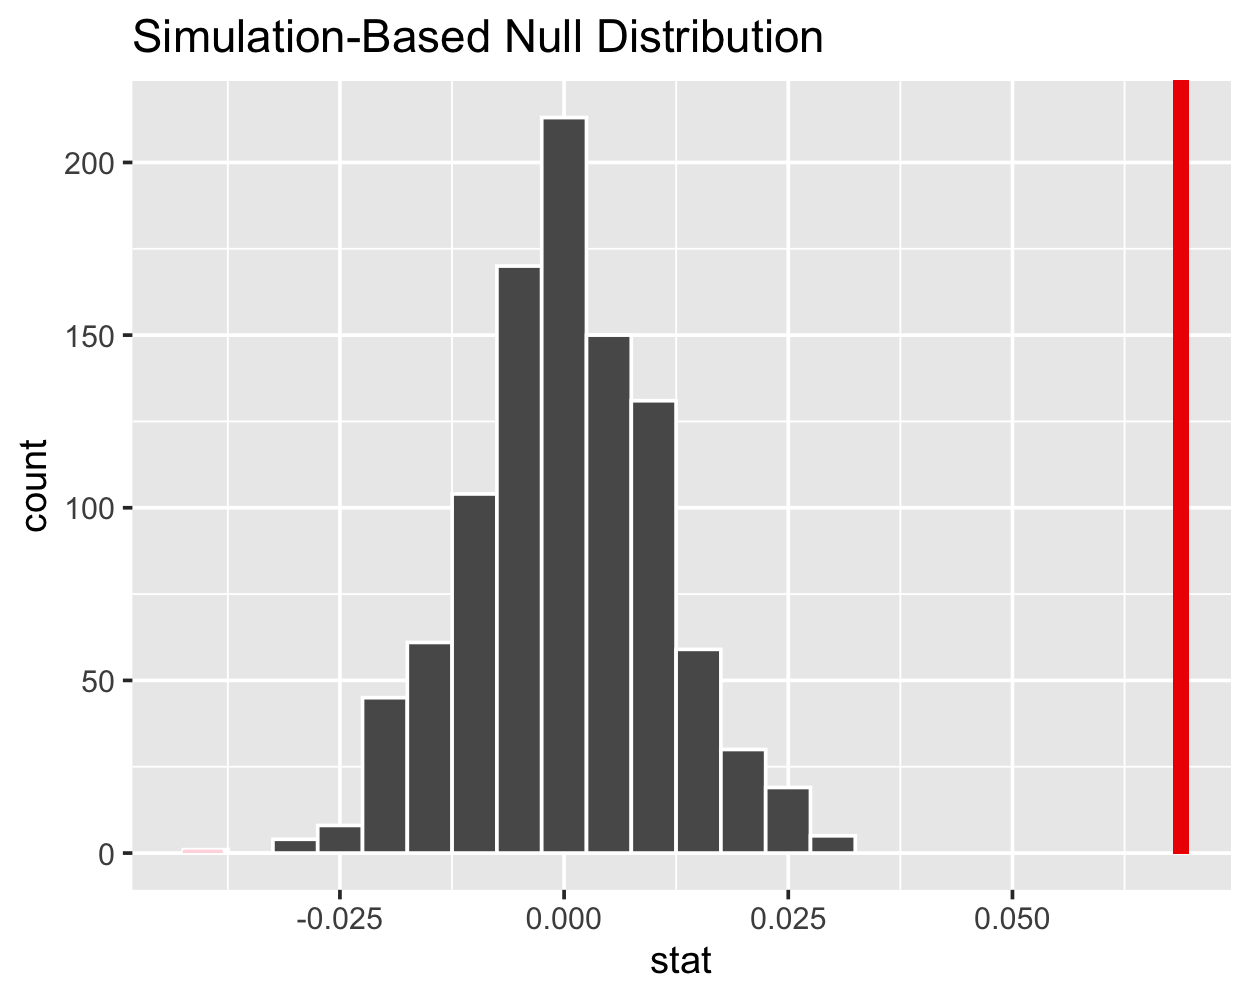

In [14]:
null_dist_nsfg |> 
    visualize() + 
    shade_p_value(obs_stat = 0.0688, direction = 'two-sided')

In [15]:
nsfg |> get_p_value(obs_stat = 0.06883397, direction = 'two-sided')

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


`geom_smooth()` using formula = 'y ~ x'


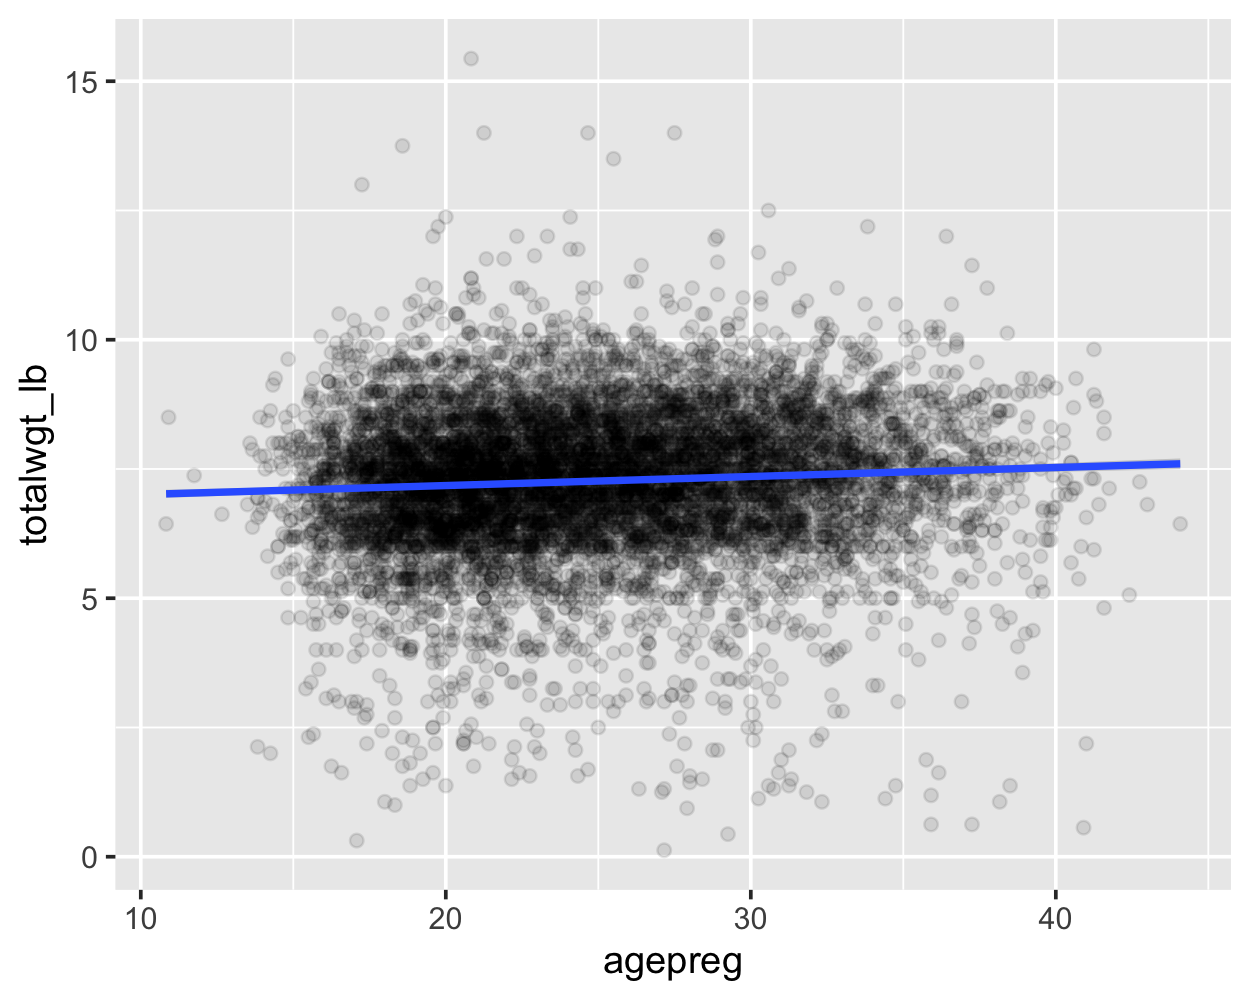

In [16]:
ggplot(nsfg, aes(x = agepreg, totalwgt_lb)) + 
    geom_point(alpha = 0.1) +
    stat_smooth(method = 'lm')